In [3]:
%matplotlib inline

In [4]:
from fastai.vision.all import *
from nbdev.showdoc import *

set_seed(2)

In [5]:
bs = 64
# bs = 16 # Uncomment if you run out of memory

In [6]:
path = untar_data(URLs.PETS)

Path.BASE_PATH = path # Display every paths relative to dataset root
path.ls()

(#2) [Path('annotations'),Path('images')]

In [7]:
path_anno = path/'annotations'
path_img = path/'images'

In [10]:
fnames = get_image_files(path_img)
fnames

(#7390) [Path('images/Abyssinian_1.jpg'),Path('images/Abyssinian_10.jpg'),Path('images/Abyssinian_100.jpg'),Path('images/Abyssinian_101.jpg'),Path('images/Abyssinian_102.jpg'),Path('images/Abyssinian_103.jpg'),Path('images/Abyssinian_104.jpg'),Path('images/Abyssinian_105.jpg'),Path('images/Abyssinian_106.jpg'),Path('images/Abyssinian_107.jpg')...]

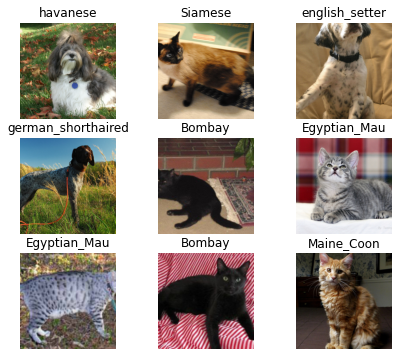

In [12]:
dls = ImageDataLoaders.from_name_re(
    path, fnames, pat=r'(.+)_\d+.jpg$', item_tfms=Resize(460), bs=bs, batch_tmfs=[*aug_transforms(size=224, min_scale=0.75), 
    Normalize.from_stats(*imagenet_stats)])

dls.show_batch(max_n=9, figsize=(7,6))